<a href="https://colab.research.google.com/github/keerthibehara/Netflix_Movies_And_TV_Shows_Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_B_Sai_Keerthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading the dataset
df=pd.read_csv('/content/drive/MyDrive/dataforassign/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


#Data Inspection

In [5]:
#Checking the first 5 rows of the dataset
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#Last 5 rows of the data
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
#Checking the shape of the data
df.shape

(7787, 12)

In [8]:
#Checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
#Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
#Checking the count of mising values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

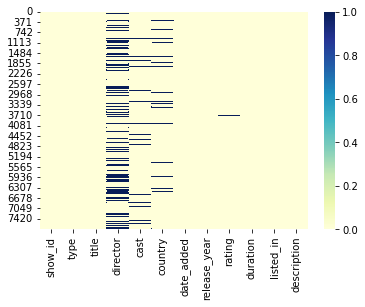

In [11]:
#Visual representaion of the missing data
sns.heatmap(df.isnull(),cmap="YlGnBu")

In [12]:
#Checking for any duplicates in the data
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
#Unique values count in the dataset
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [14]:
#Unique values in 
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

**Observations:**


1.   There are 7787 rows and 12 columns in the dataset
2.   There is only one column which is a numerical column i.e release_year
1.   There are missing values in our data
2.   The column director has 2389 missing values which is the highest followed by cast, country and date_added.
1.   There are no duplicates in the data
1.   Upon checking the unique value counts we have found that:
    
    1. "show_id" and "title" are only variables with all unique values.
    2. There 681 countries from which the content is available
    3. It is interesting to see that we have content being streamed from 73 unique years.
    4. There are 2 types of contents available- TV shows and Movies
    5. There are 14 different ratings avalaible and the unique durations are 216.

#Data Cleaning

In [15]:
#Renaming the column listed_in as genres for easy understanding
df.rename(columns = {"listed_in":"genres"},inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [16]:
#Percentages of missing data in various columns
for i in df.columns:
    percentage = df[i].isna().sum() / len(df) * 100 
    if percentage > 0 :
        print("{} Missing Values %: {}%".format(i,round(percentage,2)))

director Missing Values %: 30.68%
cast Missing Values %: 9.22%
country Missing Values %: 6.51%
date_added Missing Values %: 0.13%
rating Missing Values %: 0.09%


**Observations:**
1. As we can observe the percentage of missing values in director column is 30.68%, which is a high number so we cant just drop these values as they might contain some important data. Instead we are going to replace those with a tag 'Unavailable'. We will do the same for cast column also.
2. The country column also has a missing percentage of 6.51, we can drop this but I wish to keep them and replace them with the frequently occuring country i.e the mode. We will do the same for rating column also.
3. The date_added column cannot be replaced with anything so we will drop those missing values.


In [17]:
#Replacing the null values in director column
df['director'].replace(np.nan, "Unavailable",inplace  = True)
df['director'].isnull().sum()

0

In [18]:
#Replacing the null values in cast column
df['cast'].replace(np.nan, "Unavailable",inplace  = True)
df['cast'].isnull().sum() #Checking

0

In [19]:
#Replacing the null values in country column
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country'].isnull().sum()

0

In [20]:
# Dropping the null values of the date_added column
df.dropna(inplace=True)

In [21]:
#Replacing the null values in rating column
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['rating'].isnull().sum()

0

In [22]:
df.isnull().sum() #Checking

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

Now the data has no null values or duplicates 


#Feature Engineering

In [23]:
#Extracting two features from date_added column
df["date_added"] = pd.to_datetime(df['date_added']) 
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [24]:
#Dropping the date_added column
df.drop('date_added',axis=1,inplace=True)

In [25]:
#Checking the country column
df['country'][:12]

0                    Brazil
1                    Mexico
2                 Singapore
3             United States
4             United States
5                    Turkey
6                     Egypt
7             United States
8                     India
9                     India
10            United States
11    Poland, United States
Name: country, dtype: object

Here as we can see there two countries in some rows so we will consider first country as the primary country and retrieve that only.

In [26]:
#Retrieving the first country 
df['prime_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['prime_country'].head(2)

0    Brazil
1    Mexico
Name: prime_country, dtype: object